In [10]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from SuperpixelCutsPy import *
import scipy as sp
import pandas as pd
# Configs for Notebooks
plt.rcParams["figure.figsize"] = [9,7]
np.set_printoptions(linewidth=200)
np.set_printoptions(suppress=True)

In [11]:
n_superpixels = 1000 #2500
slic_m_param = 3  #2
sigma_param = 0.015 # 0.1 -> 0.001           #0.01
spatial_limit = 30# 15 -> 25 in steps of 5 #15
spatial_beta_param = 0.0025
spatial_dmax_param = spatial_limit
ne = 3#number of endmembers
cmap = plt.cm.get_cmap('RdBu', ne + 1)

C:\Users\apopo\AppData\Local\Temp\ipykernel_2024\2632355877.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu', ne + 1)


ASC

Preprocessed
Adjusting n_superpixels: 961
Created 961 superpixels
Created Superpixels
Initial Clustering
Spectral + Unmixing Clustering
Performed Segmentation


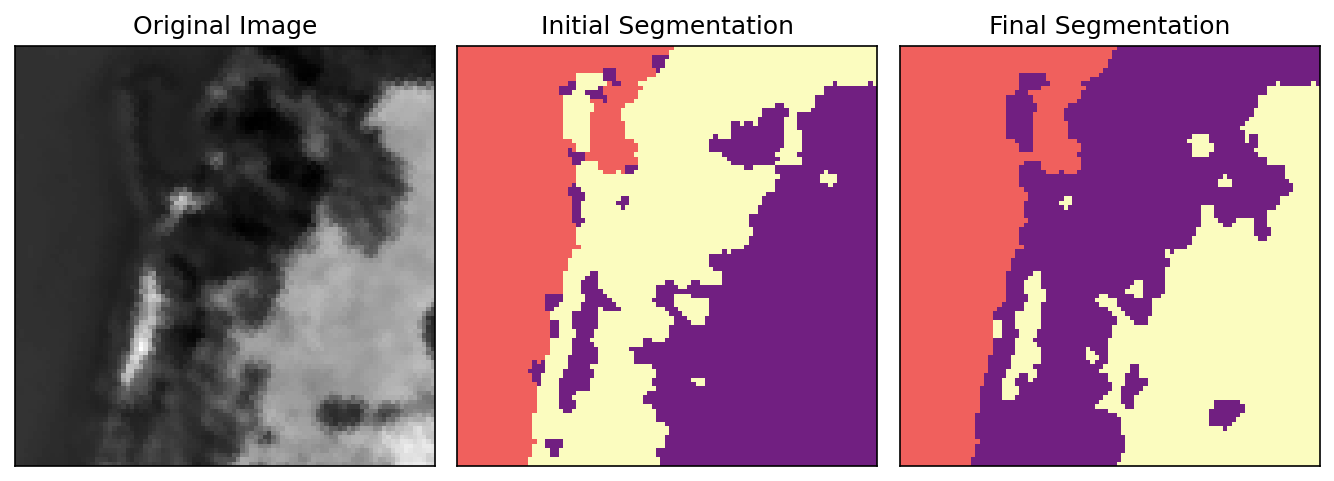

In [12]:
h5_import = h5py.File("data/samson_abc.h5",'r+').get('samson_a')
hyperspectral_cube = np.array(h5_import)
nx,ny,nb = hyperspectral_cube.shape
del h5_import

#Adaptive Superpixel Cuts
preprocessing_pipeline = Preprocesser.Preprocesser(data = hyperspectral_cube)
#preprocessing_pipeline.gaussian_blur(blur_param = 0)
preprocessing_pipeline.singular_value_decomposition(n_svd = 5)
preprocessing_pipeline.layer_normalization()
hyperspectral_cube = preprocessing_pipeline.data.copy()
original_hyperspectral_cube = preprocessing_pipeline.original_data.copy()
print('Preprocessed')

assignments, centers = superpixel.generate_SLIC_assignments(data = hyperspectral_cube,
                                                            n_superpixels = n_superpixels,
                                                            slic_m_param = slic_m_param,
                                                            verbose=True)
superpixeled_cube, superpixel_library = superpixel.generate_SLIC_superpixels(data = hyperspectral_cube,
                                                                             assignments = assignments)
n_superpixels = len(np.unique(assignments))
print('Created Superpixels')

labelled_img, normalized_signatures, int_results = normalized_cuts.graph_regularized_ncuts_admm(data=hyperspectral_cube,
                                                                                                superpixel_library=superpixel_library,
                                                                                                superpixel_centers=centers,
                                                                                                superpixel_assignments=assignments,
                                                                                                n_endmembers = ne,
                                                                                                spectral_sigma2_param= sigma_param,
                                                                                                spatial_kappa_param=spatial_limit,
                                                                                                spatial_beta_param= spatial_beta_param,
                                                                                                spatial_dmax_param = spatial_dmax_param,
                                                                                                n_unmixing_iters = 200,
                                                                                                spectral_metric='SAM')

original_library  = segmentation_evaluation.calc_mean_label_signatures(utility.cube_to_matrix(original_hyperspectral_cube),
                                                                        labelled_img.reshape(-1))
print('Performed Segmentation')

fig, ax = plt.subplots(1,3, dpi=150);
ax[0].imshow(hyperspectral_cube[:,:,20], cmap = 'gray');
ax[1].imshow((int_results['initial_labels']+1), cmap = 'magma', vmin = 0);
ax[2].imshow((labelled_img+1), cmap = 'magma', vmin = 0);

ax[0].set_title("Original Image");
ax[1].set_title("Initial Segmentation");
ax[2].set_title("Final Segmentation");

ax[0].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_xticks([]);
ax[1].set_yticks([]);
ax[2].set_xticks([]);
ax[2].set_yticks([]);
plt.tight_layout();


samson_a = hyperspectral_cube.copy()
samson_a_labels = labelled_img + 1

Preprocessed
Created 961 superpixels
Created Superpixels
Initial Clustering
Spectral + Unmixing Clustering
Performed Segmentation


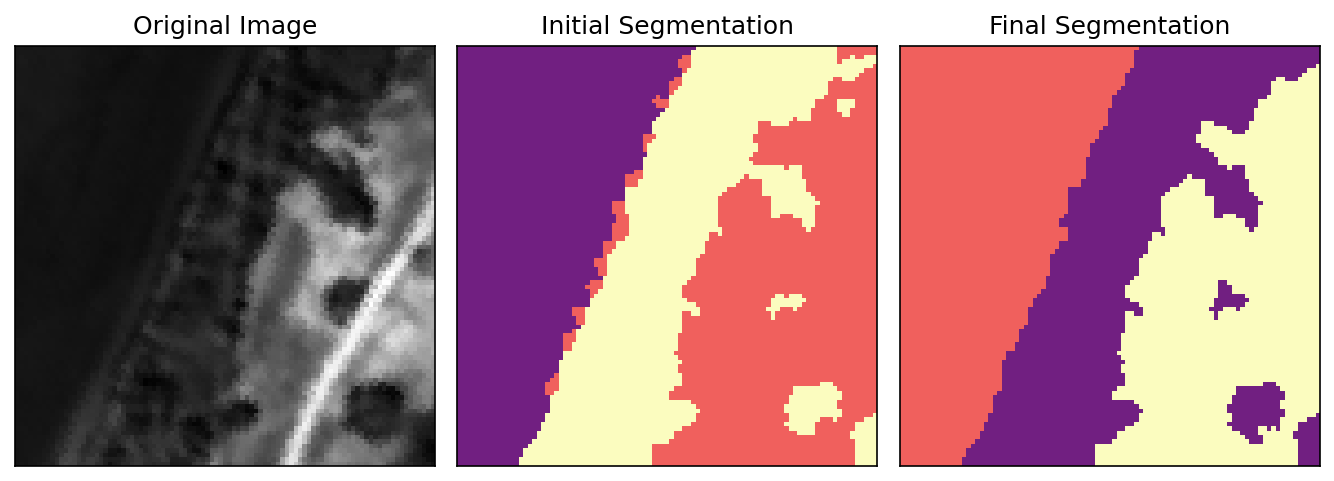

In [13]:
h5_import = h5py.File("data/samson_abc.h5",'r+').get('samson_b')
hyperspectral_cube = np.array(h5_import)
nx,ny,nb = hyperspectral_cube.shape
del h5_import

#Adaptive Superpixel Cuts
preprocessing_pipeline = Preprocesser.Preprocesser(data = hyperspectral_cube)
#preprocessing_pipeline.gaussian_blur(blur_param = 0)
preprocessing_pipeline.singular_value_decomposition(n_svd = 5)
preprocessing_pipeline.layer_normalization()
hyperspectral_cube = preprocessing_pipeline.data.copy()
original_hyperspectral_cube = preprocessing_pipeline.original_data.copy()
print('Preprocessed')

assignments, centers = superpixel.generate_SLIC_assignments(data = hyperspectral_cube,
                                                            n_superpixels = n_superpixels,
                                                            slic_m_param = slic_m_param,
                                                            verbose=True)
superpixeled_cube, superpixel_library = superpixel.generate_SLIC_superpixels(data = hyperspectral_cube,
                                                                             assignments = assignments)
n_superpixels = len(np.unique(assignments))
print('Created Superpixels')

labelled_img, normalized_signatures, int_results = normalized_cuts.graph_regularized_ncuts_admm(data=hyperspectral_cube,
                                                                                                superpixel_library=superpixel_library,
                                                                                                superpixel_centers=centers,
                                                                                                superpixel_assignments=assignments,
                                                                                                n_endmembers = ne,
                                                                                                spectral_sigma2_param= sigma_param,
                                                                                                spatial_kappa_param=spatial_limit,
                                                                                                spatial_beta_param= spatial_beta_param,
                                                                                                spatial_dmax_param = spatial_dmax_param,
                                                                                                n_unmixing_iters = 200,
                                                                                                spectral_metric='SAM')

original_library  = segmentation_evaluation.calc_mean_label_signatures(utility.cube_to_matrix(original_hyperspectral_cube),
                                                                        labelled_img.reshape(-1))
print('Performed Segmentation')

fig, ax = plt.subplots(1,3, dpi=150);
ax[0].imshow(hyperspectral_cube[:,:,20], cmap = 'gray');
ax[1].imshow((int_results['initial_labels']+1), cmap = 'magma', vmin = 0);
ax[2].imshow((labelled_img+1), cmap = 'magma', vmin = 0);

ax[0].set_title("Original Image");
ax[1].set_title("Initial Segmentation");
ax[2].set_title("Final Segmentation");

ax[0].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_xticks([]);
ax[1].set_yticks([]);
ax[2].set_xticks([]);
ax[2].set_yticks([]);
plt.tight_layout();


samson_b = hyperspectral_cube.copy()
samson_b_labels = labelled_img + 1

Preprocessed
Created 961 superpixels
Created Superpixels
Initial Clustering
Spectral + Unmixing Clustering
Performed Segmentation


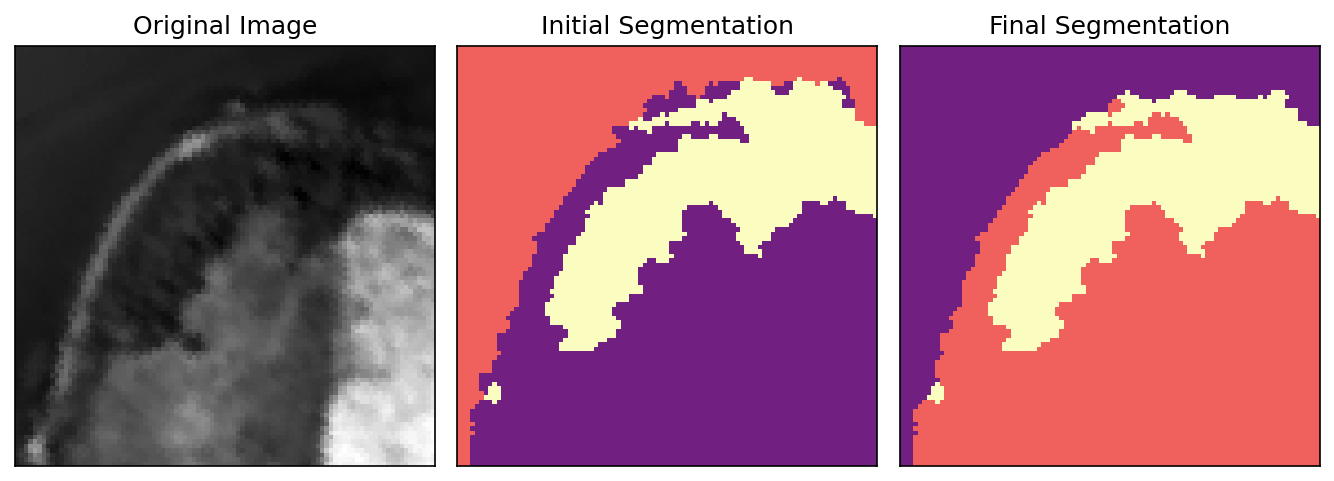

In [14]:
h5_import = h5py.File("data/samson_abc.h5",'r+').get('samson_c')
hyperspectral_cube = np.array(h5_import)
nx,ny,nb = hyperspectral_cube.shape
del h5_import

#Adaptive Superpixel Cuts
preprocessing_pipeline = Preprocesser.Preprocesser(data = hyperspectral_cube)
#preprocessing_pipeline.gaussian_blur(blur_param = 0)
preprocessing_pipeline.singular_value_decomposition(n_svd = 5)
preprocessing_pipeline.layer_normalization()
hyperspectral_cube = preprocessing_pipeline.data.copy()
original_hyperspectral_cube = preprocessing_pipeline.original_data.copy()
print('Preprocessed')

assignments, centers = superpixel.generate_SLIC_assignments(data = hyperspectral_cube,
                                                            n_superpixels = n_superpixels,
                                                            slic_m_param = slic_m_param,
                                                            verbose=True)
superpixeled_cube, superpixel_library = superpixel.generate_SLIC_superpixels(data = hyperspectral_cube,
                                                                             assignments = assignments)
n_superpixels = len(np.unique(assignments))
print('Created Superpixels')


labelled_img, normalized_signatures, int_results = normalized_cuts.graph_regularized_ncuts_admm(data=hyperspectral_cube,
                                                                                                superpixel_library=superpixel_library,
                                                                                                superpixel_centers=centers,
                                                                                                superpixel_assignments=assignments,
                                                                                                n_endmembers = ne,
                                                                                                spectral_sigma2_param= sigma_param,
                                                                                                spatial_kappa_param=spatial_limit,
                                                                                                spatial_beta_param= spatial_beta_param,
                                                                                                spatial_dmax_param = spatial_dmax_param,
                                                                                                n_unmixing_iters = 200,
                                                                                                spectral_metric='SAM')

original_library  = segmentation_evaluation.calc_mean_label_signatures(utility.cube_to_matrix(original_hyperspectral_cube),
                                                                        labelled_img.reshape(-1))
print('Performed Segmentation')

fig, ax = plt.subplots(1,3, dpi=150);
ax[0].imshow(hyperspectral_cube[:,:,20], cmap = 'gray');
ax[1].imshow((int_results['initial_labels']+1), cmap = 'magma', vmin = 0);
ax[2].imshow((labelled_img+1), cmap = 'magma', vmin = 0);

ax[0].set_title("Original Image");
ax[1].set_title("Initial Segmentation");
ax[2].set_title("Final Segmentation");

ax[0].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_xticks([]);
ax[1].set_yticks([]);
ax[2].set_xticks([]);
ax[2].set_yticks([]);
plt.tight_layout();


samson_c = hyperspectral_cube.copy()
samson_c_labels = labelled_img + 1

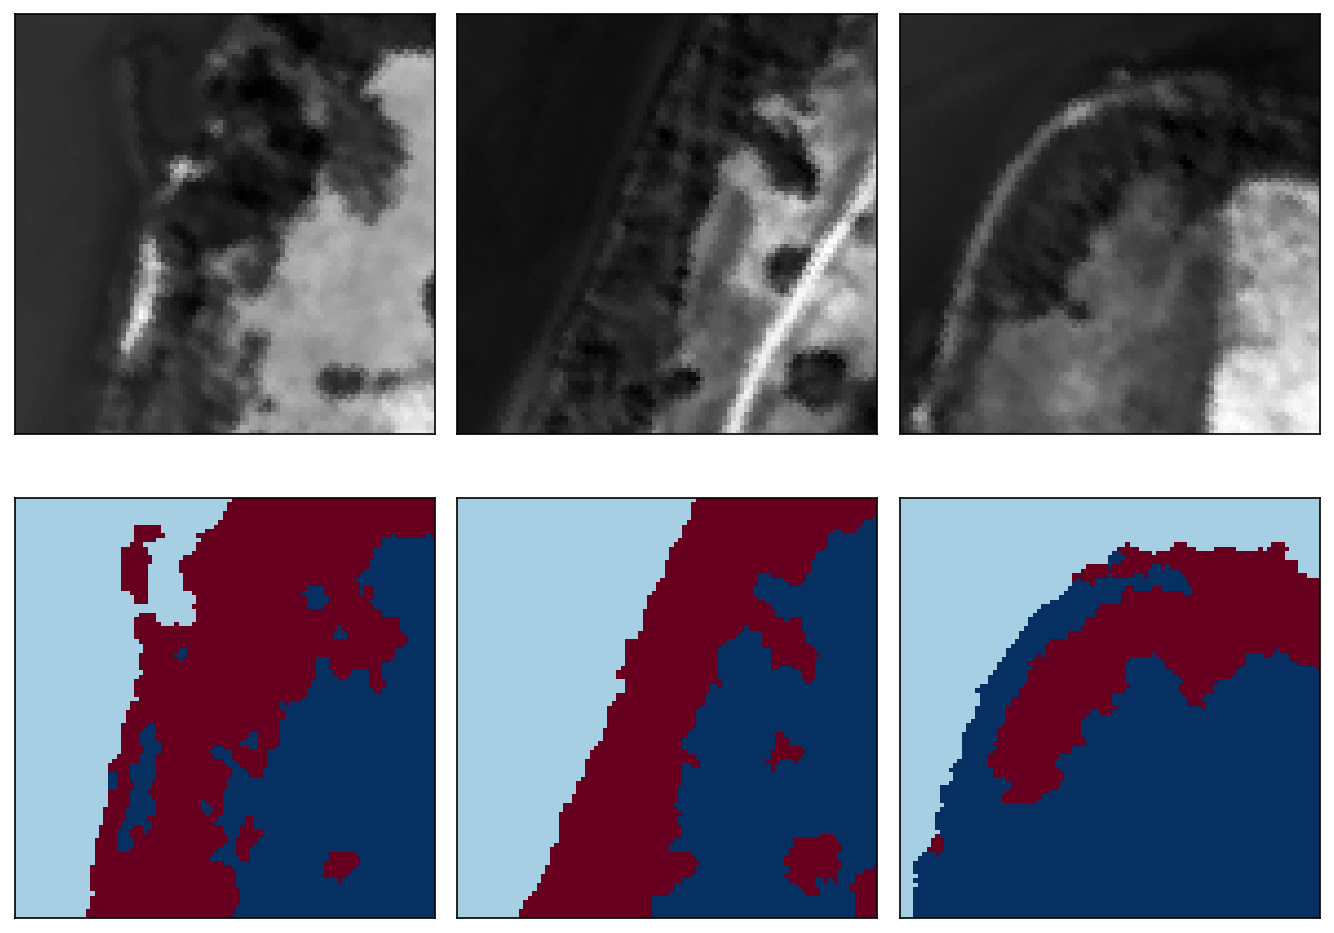

In [15]:
fig, ax = plt.subplots(2,3, dpi=150);
ax[0,0].imshow(samson_a[:,:,20], cmap = 'gray');
ax[0,1].imshow(samson_b[:,:,20], cmap = 'gray');
ax[0,2].imshow(samson_c[:,:,20], cmap = 'gray');

ax[1,0].imshow(samson_a_labels, cmap = cmap);
ax[1,1].imshow(samson_b_labels, cmap = cmap);
ax[1,2].imshow(np.vectorize(lambda x: {1 : 2, 2 : 3, 3 : 1}[x])(samson_c_labels), cmap = cmap);


ax[0,0].set_xticks([]);
ax[0,0].set_yticks([]);
ax[1,0].set_xticks([]);
ax[1,0].set_yticks([]);
ax[0,1].set_xticks([]);
ax[0,1].set_yticks([]);
ax[1,1].set_xticks([]);
ax[1,1].set_yticks([]);
ax[0,2].set_xticks([]);
ax[0,2].set_yticks([]);
ax[1,2].set_xticks([]);
ax[1,2].set_yticks([]);



plt.tight_layout();

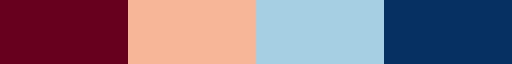

In [16]:
cmap